In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

---

Пусть задана тестовая функция $ f(x) $, на интервале [a, b].
1) Построить график этой функции на интервале [a, b]. Подготовить таблицу значений функции f(x) на интервале [a, b] для 4-х произвольных значений аргумента на [a, b] (узлов интерполяции). Построить точечный график f(x) по полученной таблице. 
2) Построить функцию S2(x) — параболический интерполяционный сплайн f(x) для заданной сетки узлов. В качестве граничного условия использовать: S2' (a)= f' (a). Показать на одном чертеже графики функций f(x) (непрерывный и точечный) и функции S2(x) на интервале [a, b].
3) Построить функцию S3(x) — естественный кубический интерполяционный сплайн f(x) для заданной сетки узлов. Показать на одном чертеже графики функций f(x) (непрерывный и точечный) и функции S3(x) на интервале [a, b].

$$ f(x) = (\sin{x})(1 + x)^{\frac{1}{3}}, \ на \ интервале \ [a, b], \ где \ a = 1, \ b = 6. $$

---

### Постановка задачи

<u>Цель</u>: получить функции параболлического и естественного кубического сплайна f(x) для заданной сетки узлов.

<u>Исходные данные</u>: тестовая функция $ f(x) $, на интервале [a, b].

<u>Модельные представления</u>: Интерполяционный параболический сплайн — это функция, состоящая из «кусочков» парабол. Эти «кусочки» состыкованы таким образом, чтобы параболический сплайн являлся непрерывно дифференцируемой функцией. Интерполяционный кубический сплайн — это определённая на отрезке [a, b] функция, m–d раз непрерывно дифференцируемая, которая на каждом отрезке [xk–1, xk], , является многочленом m-ой степени.

<u>Критерий оценки результата</u>: сплайны проходят по всем узлам интерполяции и имеют гладкий вид.

---

1) Построить график этой функции на интервале [a, b]. Подготовить таблицу значений функции f(x) на интервале [a, b] для 4-х произвольных значений аргумента на [a, b] (узлов интерполяции). Построить точечный график f(x) по полученной таблице. 

In [2]:
# Определение тестовой функции
def f(x):
    return np.sin(x) * (1 + x)**(1/3)

# Интервал [a, b]
a, b = 1, 6

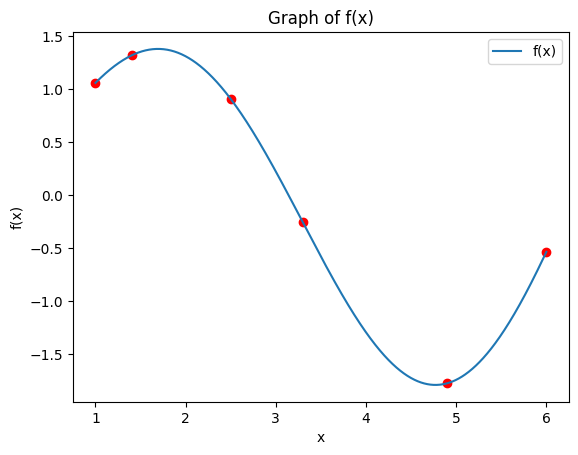

In [3]:
# Генерация значений x для графика
x_values = np.linspace(a, b, 1000)
# Генерация значений y для графика
y_values = f(x_values)

# Произвольные точки
indices = np.array([1, 1.4, 2.5, 3.3, 4.9, 6])

# Построение графика
plt.plot(x_values, y_values, label='f(x)')
plt.scatter(indices, f(indices), color='red') 
plt.title('Graph of f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


In [4]:
# Подготовка таблицы значений
table_x_values = indices
table_y_values = f(indices)

# Вывод таблицы значений
print("Таблица значений:")
print("x\tf(x)")
for x, y in zip(table_x_values, table_y_values):
    print(f"{x:.2f}\t{y:.6f}")

Таблица значений:
x	f(x)
1.00	1.060187
1.40	1.319385
2.50	0.908657
3.30	-0.256516
4.90	-1.775261
6.00	-0.534503


---

2) Построить функцию S2(x) — параболический интерполяционный сплайн f(x) для заданной сетки узлов. В качестве граничного условия использовать: S2' (a)= f' (a). Показать на одном чертеже графики функций f(x) (непрерывный и точечный) и функции S2(x) на интервале [a, b].

In [5]:
# Вычисление производных в крайних точках
f_prime_a = np.gradient(f(a), a)
f_prime_b = np.gradient(f(b), b)

# Построение параболического интерполяционного сплайна S2(x)
spline_S2 = interp1d(indices, table_y_values, kind='quadratic', 
                     bounds_error=False, fill_value='extrapolate')
x_values = np.linspace(a, b, 1000)
y_values_S2 = spline_S2(x_values)

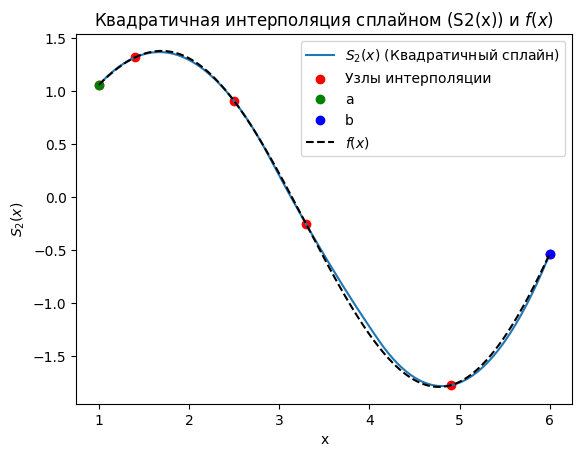

In [6]:
# Построение графика
plt.plot(x_values, y_values_S2, label='$S_2(x)$ (Квадратичный сплайн)')
plt.scatter(indices, table_y_values, color='red', label='Узлы интерполяции')
plt.plot(a, f(a), 'go', label='a')  # Граничное условие
plt.plot(b, f(b), 'bo', label='b')  # Граничное условие
plt.plot(x_values, f(x_values), label='$f(x)$', linestyle='dashed', color='black')
plt.title('Квадратичная интерполяция сплайном (S2(x)) и $f(x)$')
plt.xlabel('x')
plt.ylabel('$S_2(x)$')
plt.legend()
plt.show()

---

3) Построить функцию S3(x) — естественный кубический интерполяционный сплайн f(x) для заданной сетки узлов. Показать на одном чертеже графики функций f(x) (непрерывный и точечный) и функции S3(x) на интервале [a, b].

In [21]:
# Построение естественного кубического интерполяционного сплайна S3(x)
spline_S3 = CubicSpline(indices, table_y_values, bc_type='natural')
x_values = np.linspace(a, b, 1000)
y_values_S3 = spline_S3(x_values)

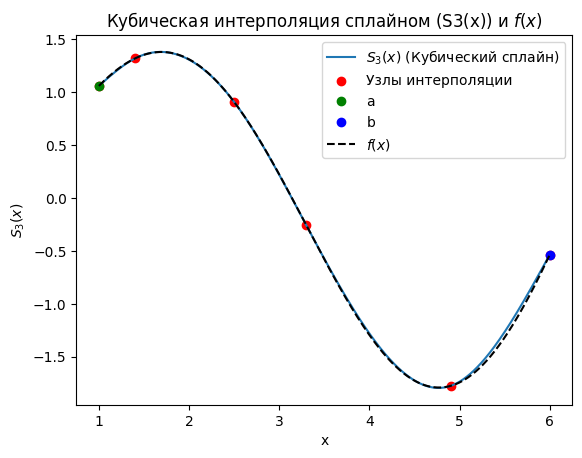

In [22]:
# Построение графика
plt.plot(x_values, y_values_S3, label='$S_3(x)$ (Кубический сплайн)')
plt.scatter(indices, table_y_values, color='red', label='Узлы интерполяции')
plt.plot(a, f(a), 'go', label='a')  # Граничное условие
plt.plot(b, f(b), 'bo', label='b')  # Граничное условие
plt.plot(x_values, f(x_values), label='$f(x)$', linestyle='dashed', color='black')
plt.title('Кубическая интерполяция сплайном (S3(x)) и $f(x)$')
plt.xlabel('x')
plt.ylabel('$S_3(x)$')
plt.legend()
plt.show()

***

## Контрольные вопросы:

3.	Дайте определение кубического интерполяционного сплайна. 

Кубическим интерполяционным сплайном, соответствующим данной функции f(x) и данной сетке узлов, называется функция S(x), удовлетворяющая следующим условиям:

1. На каждом сегменте $ [x_{i-1}, x_i]  \\ S_i (x) является полиномом третьей степени; $
2. Функции $ S(x), \ S^{'} (x), S^{''} (x) $ непрерывны на отрезке [a, b];
3. $ S(x_i) = f(x_i), \ i = 0, \ 1, \ \dots, \ n. $

---

4.	Приведите пример выбора граничных условий при построении интерполяционного кубического сплайна.

При построении интерполяционного кубического сплайна наиболее часто используются краевые условия следующих четырёх типов:

1. Краевые условия 1-го типа.
$$ S^{'} (a) = f^{'} (a), \ S^{'} (b) = f^{'} (b) $$
- на концах промежутка [a, b] задаются значения первой производной искомой функции.

2. Краевые условия 2-го типа.
$$ S^{''} (a) = f^{''} (a), \ S^{''} (b) = f^{''} (b) $$
- на концах промежутка [a, b] задаются значения второй производной искомой функции.

3. Краевые условия 3-го типа (периодические).
$$ S^{'} (a) = S^{'} (b), \ S^{''} (a) = S^{''} (b) $$
- Это условие необходимо в том случае, когда интерполируемая функция является периодической с периодом $ T = b - a $.

4. Краевые условия 4-го типа.
$$ S^{'''} (y, x_1 - 0) = S^{'''} (y, x_1 + 0), \ S^{'''} (y, x_{m-1} - 0) = S^{'''} (y, x_{m-1} + 0) $$
- Во внутренних узлах сетки третья производная функции S(x) разрывна. Однако число разрывов третьей производной можно уменьшить при помощи условий 4-го типа. В этом случае построенный сплайн будет трижды непрерывно дифференцируем на промежутках $ [x_0, x_2] \ и \ [x_{m-1}, x_m] $.

---

7.	Можно ли утверждать, что кусочная Эрмитова интерполяция выполняет построение интерполяционного сплайна. Если да, то укажите количество непрерывных производных полученной глобальной функции. Поясните ответ.

Кусочная Эрмитова интерполяция выполняет построение интерполяционного сплайна. Они строятся для каждого сегмента между соседними узлами интерполяции. Каждый сегмент представляет собой кубическую кривую, и эти сегменты соединены в гладкую функцию.

В случае кусочной Эрмитовой интерполяции глобальная функция является кусочно-полиномиальной и имеет непрерывные производные до порядка (k-1), где k - степень интерполяционного полинома между узлами. Например, если используется полином третьей степени (кусочно-кубический интерполяционный полином), то глобальная функция будет иметь непрерывные производные до второго порядка включительно.